# Load the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
sns.set_palette("pastel")

# load the dataset

In [2]:
sale=pd.read_csv("Amazon Sale Report.csv")

In [3]:
# work only 10000 rows

In [4]:
sale=sale.iloc[:10000]

# Data  Analysis

In [5]:
sale.shape

(10000, 24)

In [6]:
sale.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [7]:
sale.sample(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
667,667,403-5082537-8368348,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3468,JNE3468-KR-XXXL,kurta,...,INR,363.0,BENGALURU,KARNATAKA,560033.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
98,98,402-8519791-3706738,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET347,SET347-KR-NP-S,Set,...,INR,852.0,NEW DELHI,DELHI,110036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
6153,6153,403-8035463-4167510,04-26-22,Shipped,Amazon,Amazon.in,Expedited,SET247,SET247-KR-SHA-XL,Set,...,INR,716.0,CHENNAI,TAMIL NADU,600016.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
2284,2284,404-9270302-7523523,04-29-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0336,J0336-TP-M,Top,...,INR,599.0,kolkata,WEST BENGAL,700085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
9265,9265,403-2177234-3669132,04-24-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-M,Western Dress,...,INR,625.0,BANGALORE,KARNATAKA,560037.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN


# Drop unnecessary columns

In [8]:
sale.head(1)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN


In [9]:
# ["Order ID", "Style","SKU","ship-postal-code","B2B","ASIN","Unnamed: 22"]

In [10]:
sale.drop(columns=["Order ID", "Style","SKU","ship-postal-code","B2B","ASIN","Unnamed: 22"],inplace=True)

# Set the index

In [11]:
sale.set_index("index",inplace=True)

# Datatype of Col

In [12]:
sale.dtypes

Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-country           object
promotion-ids          object
fulfilled-by           object
dtype: object

**1-** Convert date to date-time

In [13]:
sale["Date"]=pd.to_datetime(sale["Date"])

# null values

In [14]:
sale.isnull().sum()

Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status         643
Qty                      0
currency               617
Amount                 617
ship-city                3
ship-state               3
ship-country             3
promotion-ids         3535
fulfilled-by          6305
dtype: int64

# Mean of null values

In [15]:
sale.isnull().mean()*100

Date                   0.00
Status                 0.00
Fulfilment             0.00
Sales Channel          0.00
ship-service-level     0.00
Category               0.00
Size                   0.00
Courier Status         6.43
Qty                    0.00
currency               6.17
Amount                 6.17
ship-city              0.03
ship-state             0.03
ship-country           0.03
promotion-ids         35.35
fulfilled-by          63.05
dtype: float64

**we will see that round about 65% data are missing in fulfilled-by col 35% data missing in promotion_id 6% data missing in amount currency and couier col**

# See the null values

In [16]:
sale["fulfilled-by"].reset_index().sample(30)

,index,fulfilled-by
7846,7846,NaN
7222,7222,Easy Ship
5028,5028,NaN
1540,1540,NaN
4281,4281,NaN
4067,4067,Easy Ship
885,885,NaN
1573,1573,NaN
2917,2917,NaN
7459,7459,NaN


**we will notice that fullfilled_by col contain only East Ship value except missing values so it is possible this ship is reserved only East part so we will fill the missing value with "East Ship"**

In [17]:
sale["fulfilled-by"]=sale["fulfilled-by"].fillna("Easy Ship")

In [18]:
sale["promotion-ids"].reset_index().sample(10)

,index,promotion-ids
9254,9254,IN Core Free Shipping 2015/04/08 23-48-5-108
2904,2904,NaN
4379,4379,Amazon PLCC Free-Financing Universal Merchant ...
6469,6469,Amazon PLCC Free-Financing Universal Merchant ...
8513,8513,NaN
7530,7530,Amazon PLCC Free-Financing Universal Merchant ...
3065,3065,NaN
7005,7005,Amazon PLCC Free-Financing Universal Merchant ...
7754,7754,IN Core Free Shipping 2015/04/08 23-48-5-108
8168,8168,Amazon PLCC Free-Financing Universal Merchant ...


**promotion_id can give any necessary information so will simply drop it**

In [19]:
sale.drop(columns=["promotion-ids"],inplace=True)

**In amount ,Currecny and Courier col contain only 6% missing value we have a record of 10000 so we will drop these values**

In [20]:
sale.dropna(inplace=True)

In [21]:
sale.isnull().sum()

Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-country          0
fulfilled-by          0
dtype: int64

**Now we have no missing values**

# Duplicates

In [22]:
sale.duplicated().sum()

268

# See the duplicate 

In [23]:
sale[sale.duplicated()]

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-country,fulfilled-by
index,,,,,,,,,,,,,,,
110,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Set,L,Shipped,1,INR,788.0,NEW DELHI,DELHI,IN,Easy Ship
167,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,kurta,S,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,IN,Easy Ship
307,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,kurta,L,Shipped,1,INR,399.0,Dehradun,UTTARAKHAND,IN,Easy Ship
331,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,Set,XXL,Unshipped,1,INR,654.0,MYSURU,KARNATAKA,IN,Easy Ship
344,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,Set,XXL,Unshipped,1,INR,654.0,MYSURU,KARNATAKA,IN,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740,2022-04-24,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,Shipped,1,INR,499.0,NAVI MUMBAI,MAHARASHTRA,IN,Easy Ship
9781,2022-04-24,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,XXL,Shipped,1,INR,533.0,Hyderabad,TELANGANA,IN,Easy Ship
9803,2022-04-24,Shipped,Amazon,Amazon.in,Expedited,kurta,XXL,Shipped,1,INR,518.0,BENGALURU,KARNATAKA,IN,Easy Ship


In [24]:
sale.drop_duplicates(keep="first",inplace=True)

In [25]:
sale.duplicated().sum()

0

# info

In [26]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8637 entries, 1 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                8637 non-null   datetime64[ns]
 1   Status              8637 non-null   object        
 2   Fulfilment          8637 non-null   object        
 3   Sales Channel       8637 non-null   object        
 4   ship-service-level  8637 non-null   object        
 5   Category            8637 non-null   object        
 6   Size                8637 non-null   object        
 7   Courier Status      8637 non-null   object        
 8   Qty                 8637 non-null   int64         
 9   currency            8637 non-null   object        
 10  Amount              8637 non-null   float64       
 11  ship-city           8637 non-null   object        
 12  ship-state          8637 non-null   object        
 13  ship-country        8637 non-null   object        
 1

# Summary(Num-col)

In [27]:
sale.describe()

,Date,Qty,Amount
count,8637,8637.000000,8637.000000
mean,2022-04-27 02:22:52.976727808,1.002779,625.111150
min,2022-04-24 00:00:00,1.000000,0.000000
25%,2022-04-25 00:00:00,1.000000,435.000000
50%,2022-04-27 00:00:00,1.000000,571.000000
75%,2022-04-29 00:00:00,1.000000,783.000000
max,2022-04-30 00:00:00,3.000000,2224.000000
std,NaN,0.056873,275.156025


**Some miss understanding in Amount col max value is to high**

# Summary(Cat-Col)

In [28]:
sale.describe(include="object")

,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,8637,8637,8637,8637,8637,8637,8637,8637,8637,8637,8637,8637
unique,6,2,1,2,8,11,2,1,1769,48,1,1
top,Shipped,Amazon,Amazon.in,Expedited,Set,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,5309,5647,8637,5557,3557,1535,8299,8637,711,1471,8637,8637


# See unique value

In [29]:
for i in sale.describe(include="object"):
    print("unique value in: ",i)
    print(sale[i].unique())
    print("total: ",sale[i].nunique())
    print("*"*50)

unique value in:  Status
['Shipped - Delivered to Buyer' 'Shipped' 'Cancelled'
 'Shipped - Returned to Seller' 'Shipped - Rejected by Buyer'
 'Shipped - Lost in Transit']
total:  6
**************************************************
unique value in:  Fulfilment
['Merchant' 'Amazon']
total:  2
**************************************************
unique value in:  Sales Channel 
['Amazon.in']
total:  1
**************************************************
unique value in:  ship-service-level
['Standard' 'Expedited']
total:  2
**************************************************
unique value in:  Category
['kurta' 'Top' 'Set' 'Western Dress' 'Ethnic Dress' 'Bottom' 'Saree'
 'Blouse']
total:  8
**************************************************
unique value in:  Size
['3XL' 'XL' 'L' 'S' 'XXL' 'XS' '6XL' 'M' '4XL' '5XL' 'Free']
total:  11
**************************************************
unique value in:  Courier Status
['Shipped' 'Unshipped']
total:  2
********************************************

# Dxploratory Data Analysis

# Num_col
**There is only one numerical col Amount**

In [30]:
sale.columns

Index(['Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level',
       'Category', 'Size', 'Courier Status', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-country', 'fulfilled-by'],
      dtype='object')

## Amount

In [31]:
sale["Amount"].describe()

count    8637.000000
mean      625.111150
std       275.156025
min         0.000000
25%       435.000000
50%       571.000000
75%       783.000000
max      2224.000000
Name: Amount, dtype: float64

In [32]:
sale[sale["Amount"]>2000]

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-country,fulfilled-by
index,,,,,,,,,,,,,,,
265,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Set,XXL,Shipped,2,INR,2130.0,MUMBAI,MAHARASHTRA,IN,Easy Ship
647,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Set,S,Shipped,2,INR,2224.0,VASAI VIRAR,MAHARASHTRA,IN,Easy Ship
3289,2022-04-28,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Western Dress,M,Shipped,3,INR,2175.0,KANPUR,UTTAR PRADESH,IN,Easy Ship


<Axes: ylabel='Frequency'>

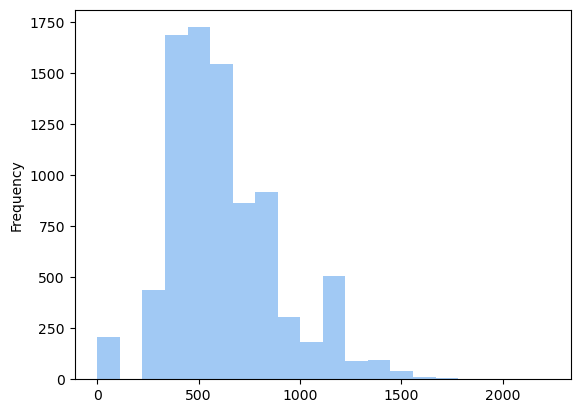

In [33]:
sale["Amount"].plot(kind="hist",bins=20)

<Axes: ylabel='Density'>

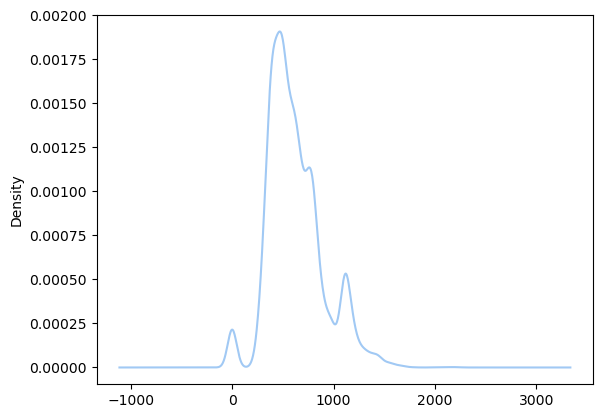

In [34]:
sale["Amount"].plot(kind="kde")

<Axes: >

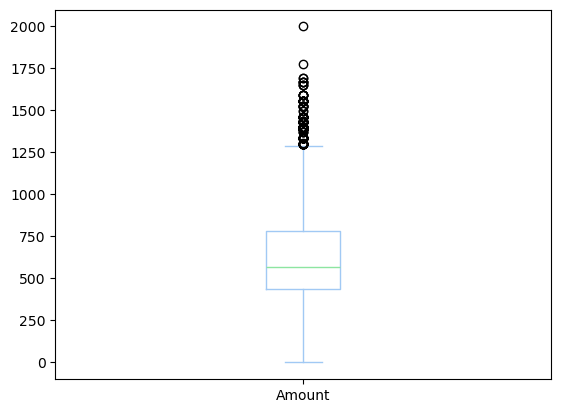

In [35]:
sale[sale["Amount"]<2000]["Amount"].plot(kind="box")

In [36]:
sale["Amount"].skew()

0.7865314790630212

# Conclussion
**1** There are certian outliers. **2-** Data can't be completly normally Distrubuted

# Categorical Col

## Status

In [37]:
sale["Status"].value_counts().index

Index(['Shipped', 'Shipped - Delivered to Buyer', 'Cancelled',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit'],
      dtype='object', name='Status')

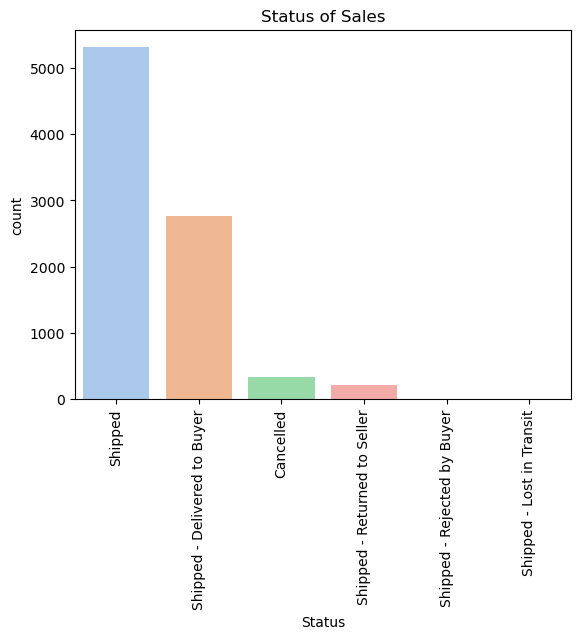

In [38]:
plt.title("Status of Sales")
sns.barplot(data=sale,x=sale["Status"].value_counts().index,y=sale["Status"].value_counts())
plt.xticks(rotation="vertical")
plt.show()

In [39]:
sale["Status"].value_counts(normalize=True)*100

Status
Shipped                         61.468102
Shipped - Delivered to Buyer    32.094477
Cancelled                        3.913396
Shipped - Returned to Seller     2.477712
Shipped - Rejected by Buyer      0.023156
Shipped - Lost in Transit        0.023156
Name: proportion, dtype: float64

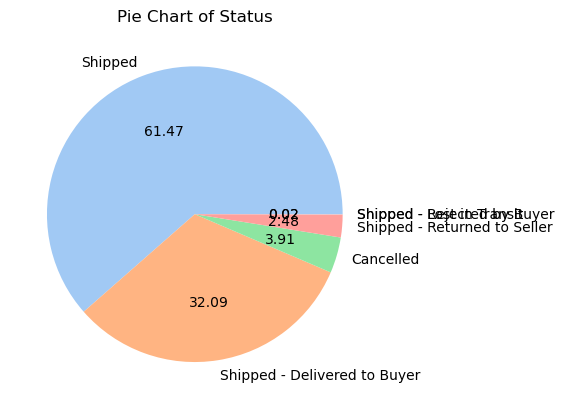

In [40]:
plt.title("Pie Chart of Status")
plt.pie(sale["Status"].value_counts(),labels=sale["Status"].value_counts().index,autopct="%.2f")
plt.show()

In [41]:
def cat_detail(col):
    print(sale[col].value_counts())
    print("*"*50)
    print()
    print("Interm of percentage: ")
    print(sale[col].value_counts(normalize=True)*100)
    
        # Bar plot 
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.title(f"{col} of sale")
    sns.barplot(x=sale[col].value_counts().index,y=sale[col].value_counts(),palette="pastel")
        

In [42]:
def cat_detail(col):
    print(sale[col].value_counts())
    print("*"*50)
    print()
    print("Interm of percentage: ")
    print(sale[col].value_counts(normalize=True)*100)
    
        # Bar plot 
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.title(f"{col} of sale")
    sns.barplot(x=sale[col].value_counts().index,y=sale[col].value_counts(),palette="pastel")
        

In [43]:
def cat_detail(col):
    print(sale[col].value_counts())
    print("*"*50)
    print()
    print("Interm of percentage: ")
    print(sale[col].value_counts(normalize=True)*100)
    
        # Bar plot 
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.title(f"{col} of sale")
    sns.barplot(x=sale[col].value_counts().index,y=sale[col].value_counts(),palette="pastel")
    plt.xticks(rotation="vertical")

In [44]:
def cat_detail(col):
    print(sale[col].value_counts())
    print("*"*50)
    print()
    print("Interm of percentage: ")
    print(sale[col].value_counts(normalize=True)*100)
    
    if(len(sale[col].value_counts().index)<5):
        # Bar plot 
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.title(f"{col} of sale")
        sns.barplot(x=sale[col].value_counts().index,y=sale[col].value_counts(),palette="pastel")
        plt.xticks(rotation="vertical")

        # pie chart
        plt.subplot(1,2,2)
        plt.title(f"pie chart of {col}")
        plt.pie(sale[col].value_counts(),labels=sale[col].value_counts().index,autopct="%.2f")
        plt.show()
    else:
        top_cateory=sale[col].value_counts().nlargest(5)
    
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.title(f"{col} of Sale")
        sns.barplot(x=top_cateory.index,y=top_cateory)
        plt.xticks(rotation="vertical")
        
        #pie chart
        plt.subplot(1,2,2)
        plt.title(f"pie chart of {col}")
        plt.pie(top_cateory,labels=top_cateory.index,autopct="%.2f")
        plt.show()

# Fulfillment

Fulfilment
Amazon      5647
Merchant    2990
Name: count, dtype: int64
**************************************************

Interm of percentage: 
Fulfilment
Amazon      65.381498
Merchant    34.618502
Name: proportion, dtype: float64


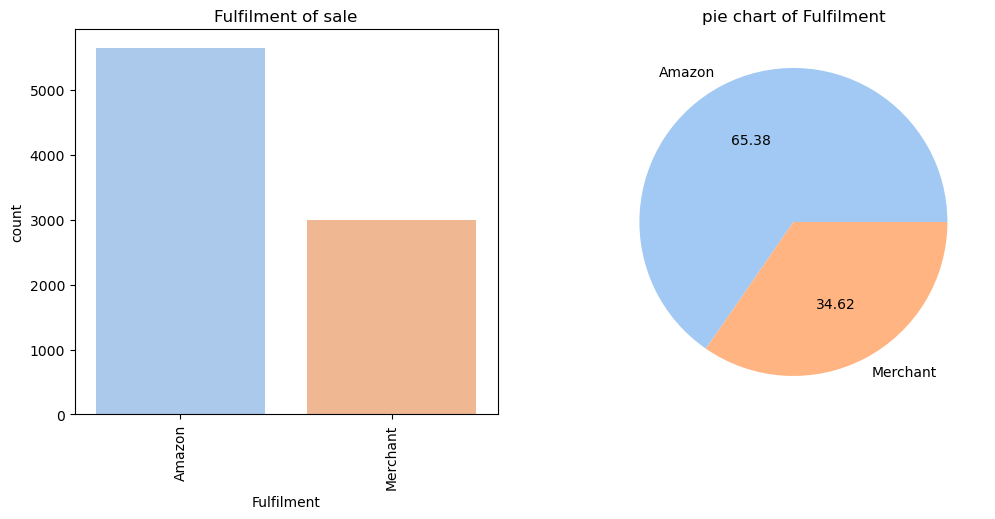

In [45]:
cat_detail("Fulfilment")

# Sales Channel

Sales Channel 
Amazon.in    8637
Name: count, dtype: int64
**************************************************

Interm of percentage: 
Sales Channel 
Amazon.in    100.0
Name: proportion, dtype: float64


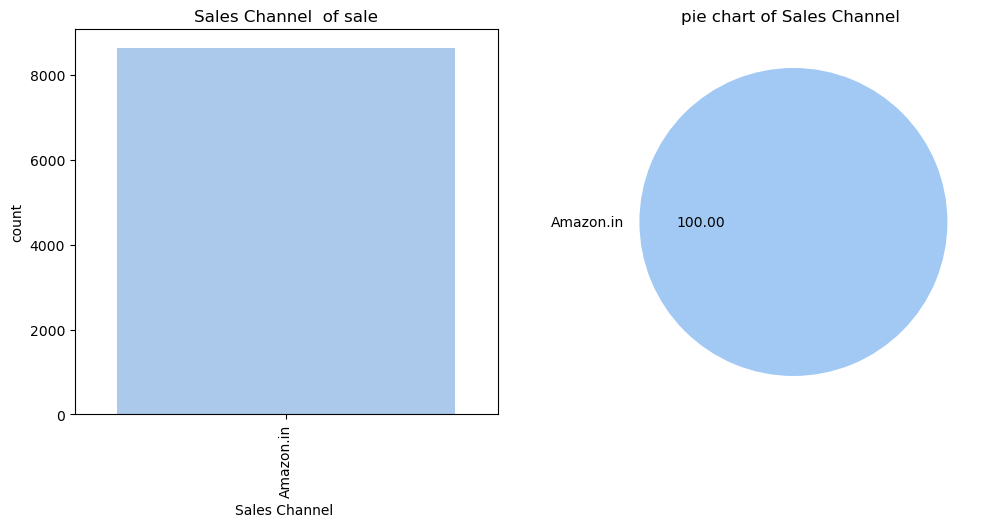

In [46]:
cat_detail("Sales Channel ")

# ship-service-level

ship-service-level
Expedited    5557
Standard     3080
Name: count, dtype: int64
**************************************************

Interm of percentage: 
ship-service-level
Expedited    64.33947
Standard     35.66053
Name: proportion, dtype: float64


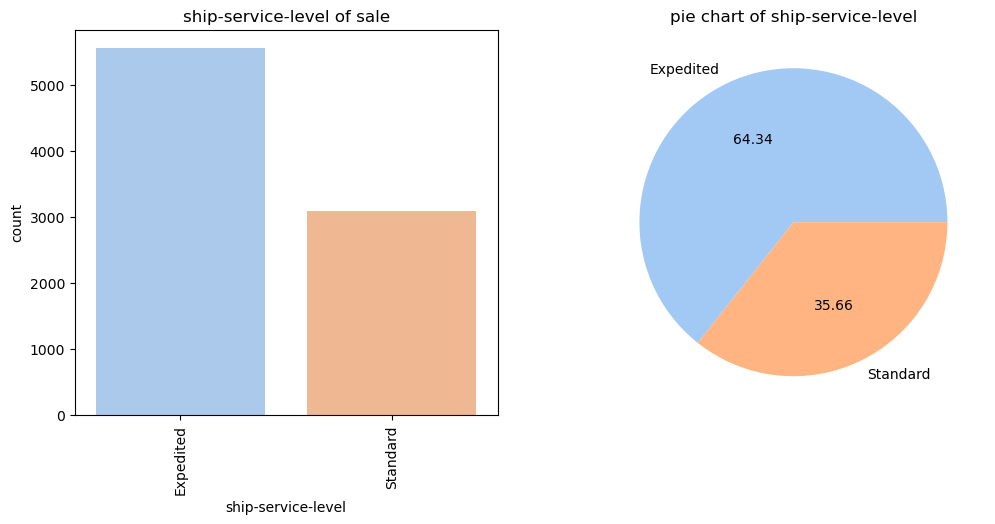

In [47]:
cat_detail("ship-service-level")

# Categoy

Category
Set              3557
kurta            3378
Top               772
Western Dress     751
Blouse             71
Ethnic Dress       54
Bottom             35
Saree              19
Name: count, dtype: int64
**************************************************

Interm of percentage: 
Category
Set              41.183281
kurta            39.110802
Top               8.938289
Western Dress     8.695149
Blouse            0.822045
Ethnic Dress      0.625217
Bottom            0.405233
Saree             0.219984
Name: proportion, dtype: float64


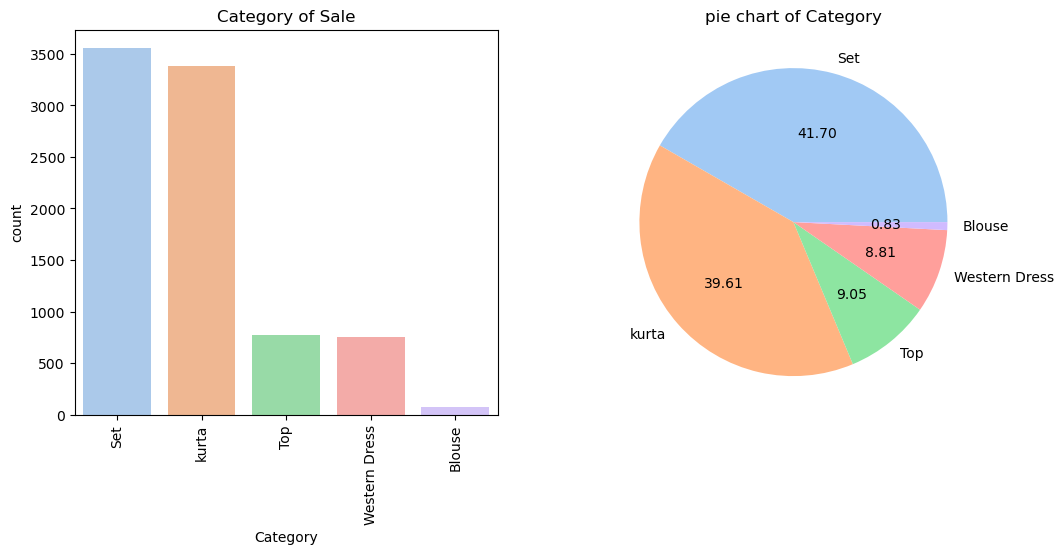

In [48]:
cat_detail("Category")

# Size

Size
M       1535
XL      1458
L       1406
XXL     1220
S       1147
3XL     1039
XS       770
Free      34
6XL       13
5XL       12
4XL        3
Name: count, dtype: int64
**************************************************

Interm of percentage: 
Size
M       17.772375
XL      16.880861
L       16.278801
XXL     14.125275
S       13.280074
3XL     12.029640
XS       8.915133
Free     0.393655
6XL      0.150515
5XL      0.138937
4XL      0.034734
Name: proportion, dtype: float64


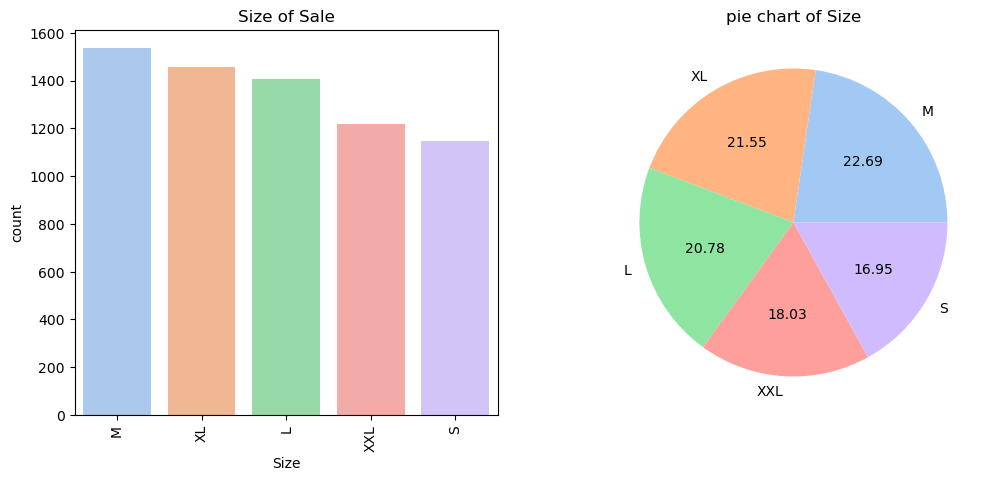

In [49]:
cat_detail("Size")

# Courier Status

Courier Status
Shipped      8299
Unshipped     338
Name: count, dtype: int64
**************************************************

Interm of percentage: 
Courier Status
Shipped      96.086604
Unshipped     3.913396
Name: proportion, dtype: float64


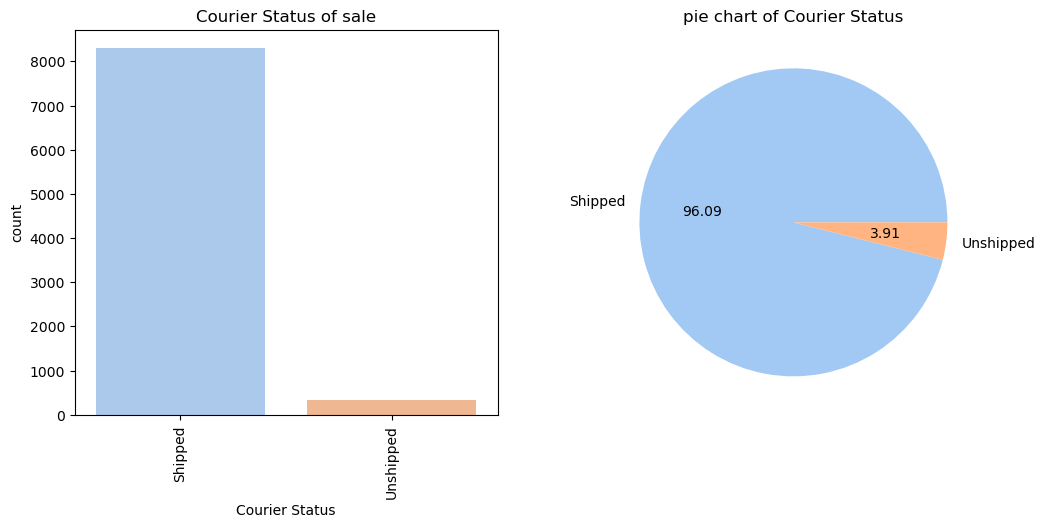

In [50]:
cat_detail("Courier Status")

# Ship City

In [51]:
# Find the top 20 city
top=20
top_city=sale["ship-city"].value_counts().nlargest(top)

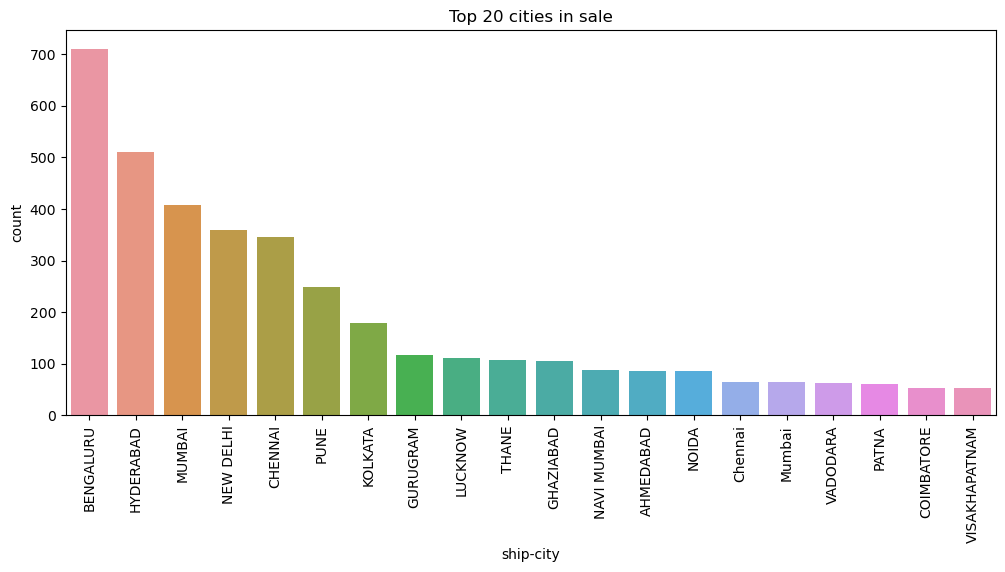

In [52]:
plt.figure(figsize=(12,5))
plt.title("Top 20 cities in sale")
sns.barplot(x=top_city.index,y=top_city)
plt.xticks(rotation="vertical")
plt.show()

# ship-state
**There are total 48 states we will get the only top 15 state** 

In [53]:
top_state=sale["ship-state"].value_counts().nlargest(15)

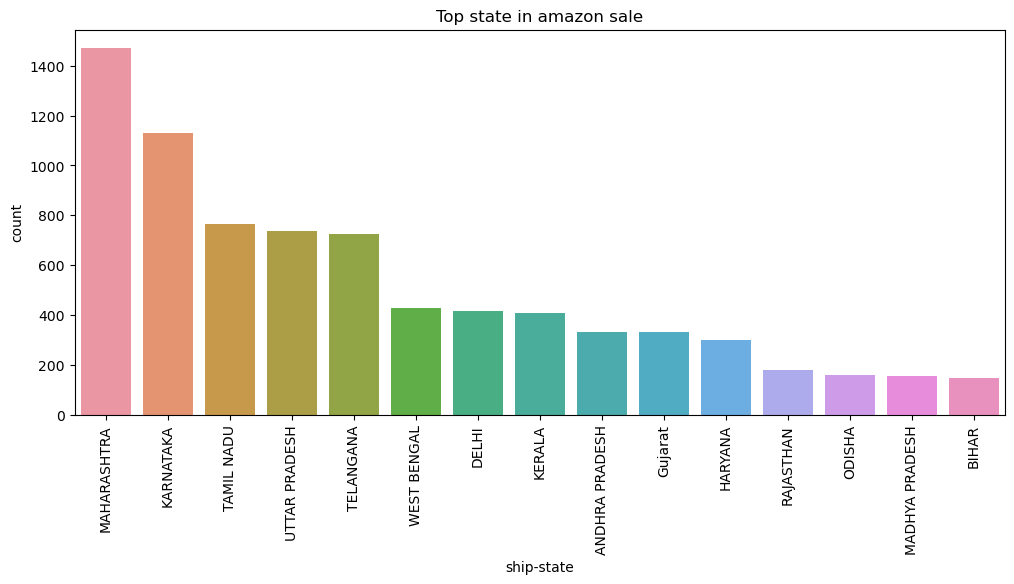

In [54]:
plt.figure(figsize=(12,5))
plt.title("Top state in amazon sale")
sns.barplot(x=top_state.index,y=top_state)
plt.xticks(rotation="vertical")
plt.show()

# Bi-variate Analysis

**we have only one numerical col so bivariate analysis on num-num is not possible**

# Cat-Cat

## Status vs Fulfillment

In [55]:
status=sale.groupby(["Status"])["Fulfilment"].value_counts().sort_values(ascending=False).reset_index().head(4)
status

,Status,Fulfilment,count
0,Shipped,Amazon,5309
1,Shipped - Delivered to Buyer,Merchant,2772
2,Cancelled,Amazon,338
3,Shipped - Returned to Seller,Merchant,214


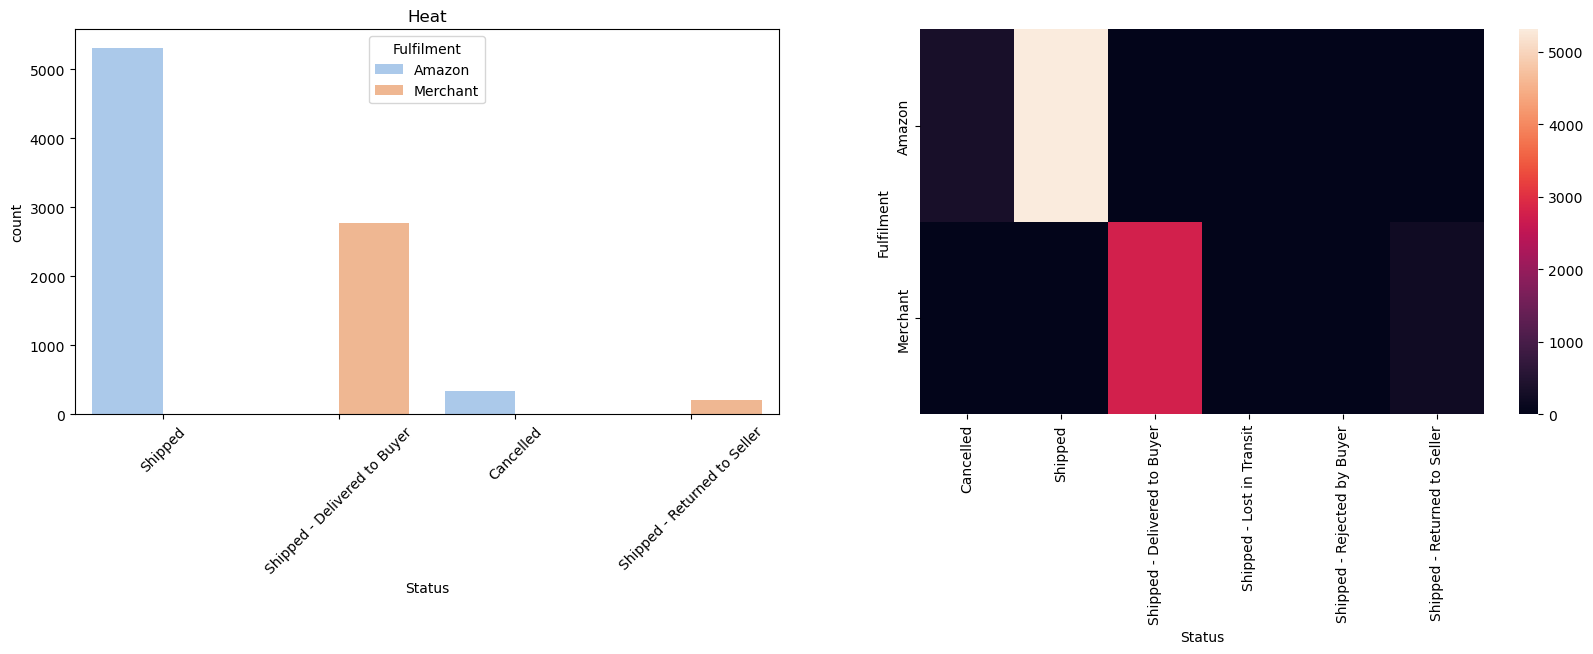

In [56]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Status Vs Fulfilment")
sns.barplot(data=status,x=status["Status"],y=status["count"],hue=status["Fulfilment"])
plt.xticks(rotation=45)

plt.title("Heat")
plt.subplot(1,2,2)
sns.heatmap(pd.crosstab(sale["Fulfilment"],sale["Status"]))
plt.show()

# Status vs Category
**Find top 10 category**

In [57]:
top_cat=sale.groupby(["Status"])["Category"].value_counts().nlargest(10).reset_index()
top_cat.head(1)

,Status,Category,count
0,Shipped,Set,2190


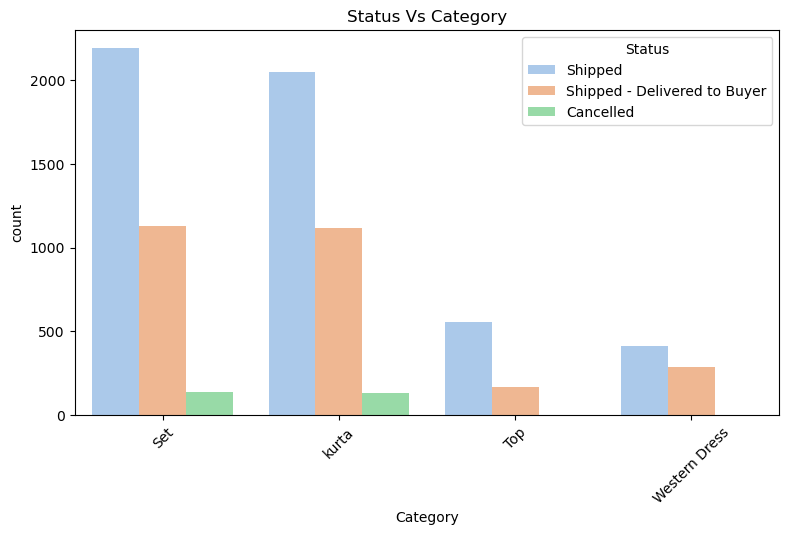

In [58]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Status Vs Category")
sns.barplot(data=top_cat,x="Category",y="count",hue="Status")
plt.xticks(rotation=45)
plt.show()

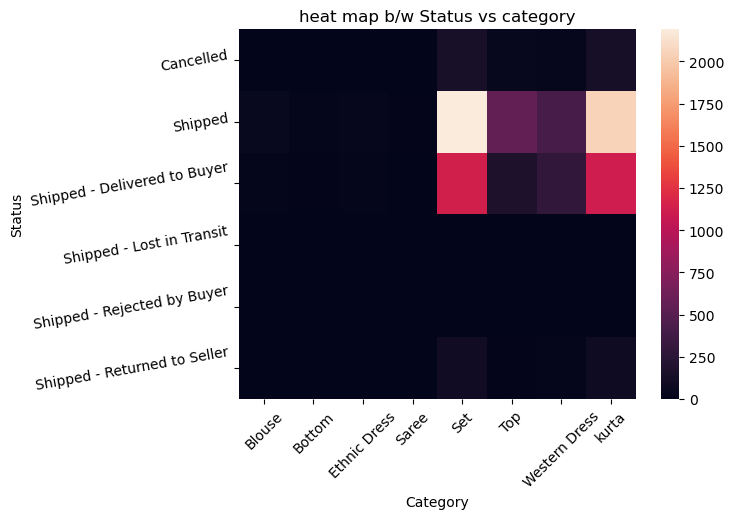

In [59]:
plt.title("heat map b/w Status vs category")
sns.heatmap(pd.crosstab(sale["Status"],sale["Category"]))
plt.xticks(rotation=45)
plt.yticks(rotation=10)
plt.show()

In [60]:
sale.head(1)

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-country,fulfilled-by
index,,,,,,,,,,,,,,,
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,IN,Easy Ship


# Status vs Ship city

In [61]:
ship_city=sale.groupby(["Status"])["ship-city"].value_counts().nlargest(20).reset_index()
ship_city.head(2)

,Status,ship-city,count
0,Shipped,BENGALURU,445
1,Shipped,HYDERABAD,335


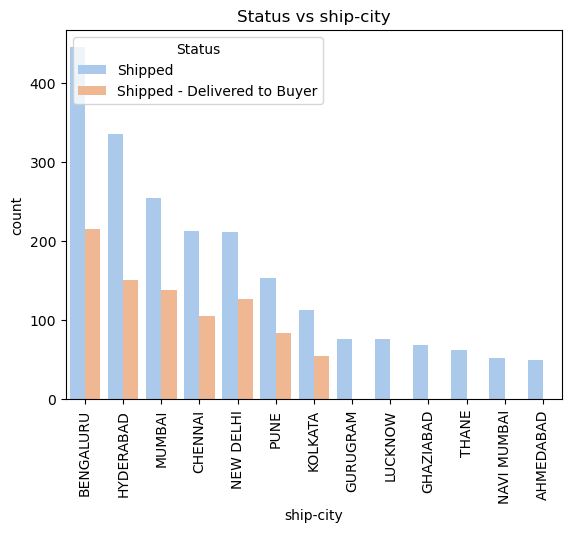

In [62]:
plt.title("Status vs ship-city")
sns.barplot(data=ship_city,x="ship-city",y="count",hue="Status")
plt.xticks(rotation="vertical")
plt.show()

In [77]:
filter_data=sale["ship-city"].value_counts().nlargest(20).index
new_df=sale[sale["ship-city"].isin(filter_data)]

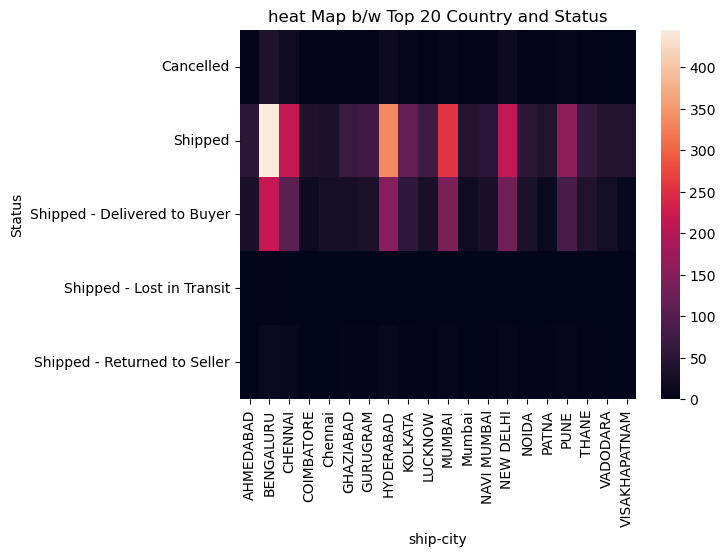

In [79]:
plt.title("heat Map b/w Top 20 Country and Status")
sns.heatmap(pd.crosstab(new_df["Status"],new_df["ship-city"]))
plt.show()

In [80]:
sale.head(1)

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-country,fulfilled-by
index,,,,,,,,,,,,,,,
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,IN,Easy Ship


# Status vs Ship-state

In [86]:
ship_state=sale.groupby(["Status"])["ship-state"].value_counts().nlargest(15).reset_index()
ship_state.head(1)

,Status,ship-state,count
0,Shipped,MAHARASHTRA,926


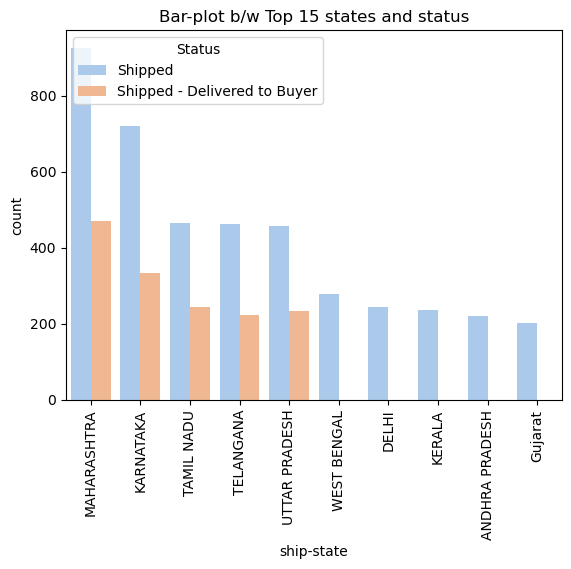

In [89]:
plt.title("Bar-plot b/w Top 15 states and status")
sns.barplot(data=ship_state,x="ship-state",y="count",hue="Status")
plt.xticks(rotation="vertical")
plt.show()

In [105]:
mask=sale["ship-state"].value_counts().nlargest(15).index

ship_sate2=sale[sale["ship-state"].isin(mask)]

pd.crosstab(ship_sate2["Status"],ship_sate2["ship-state"])

ship-state,ANDHRA PRADESH,BIHAR,DELHI,Gujarat,HARYANA,KARNATAKA,KERALA,MADHYA PRADESH,MAHARASHTRA,ODISHA,RAJASTHAN,TAMIL NADU,TELANGANA,UTTAR PRADESH,WEST BENGAL
Status,,,,,,,,,,,,,,,
Cancelled,9,9,16,10,8,59,18,9,46,6,7,39,19,25,15
Shipped,220,95,244,201,179,719,236,86,926,106,97,466,461,456,279
Shipped - Delivered to Buyer,97,36,150,113,103,333,143,59,470,41,70,245,223,233,123
Shipped - Lost in Transit,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
Shipped - Rejected by Buyer,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
Shipped - Returned to Seller,7,7,6,8,10,18,12,3,28,6,4,16,21,24,10


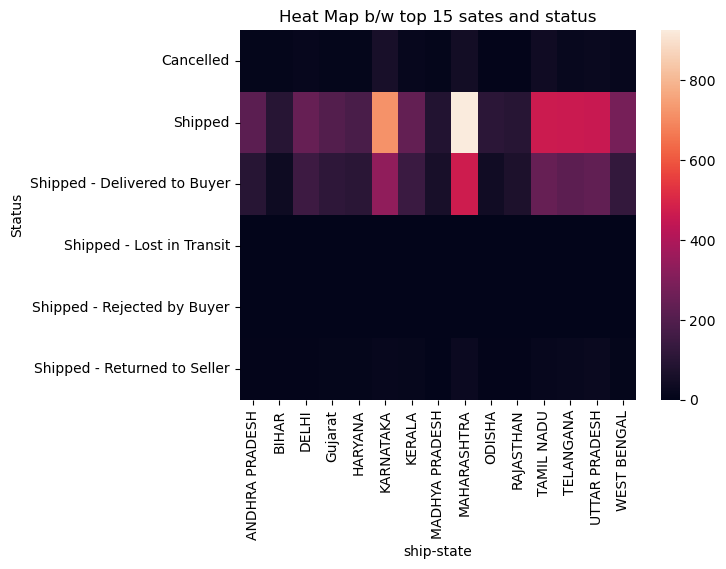

In [104]:
plt.title("Heat Map b/w top 15 sates and status")
sns.heatmap(pd.crosstab(ship_sate2["Status"],ship_sate2["ship-state"]))
plt.show()

# Num-Cat Col
## Amount Vs Status

In [115]:
color=["red","green","blue","gray","yellow"]

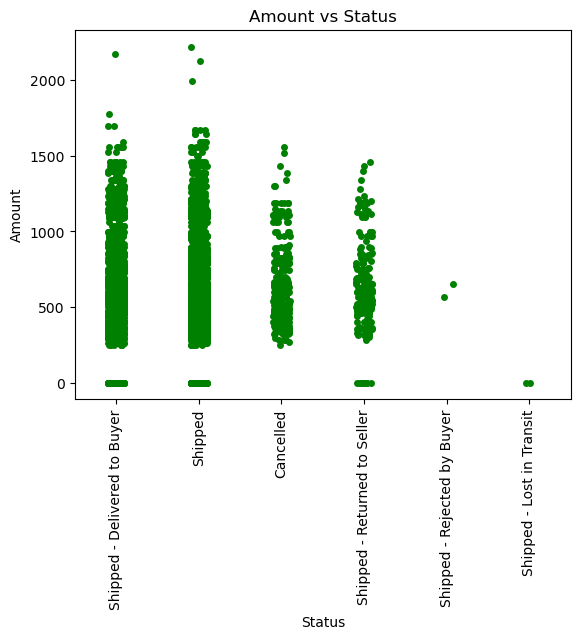

In [119]:
plt.title("Amount vs Status")
sns.stripplot(data=sale,x="Status",y="Amount",color="green")
plt.xticks(rotation="vertical")
plt.show()

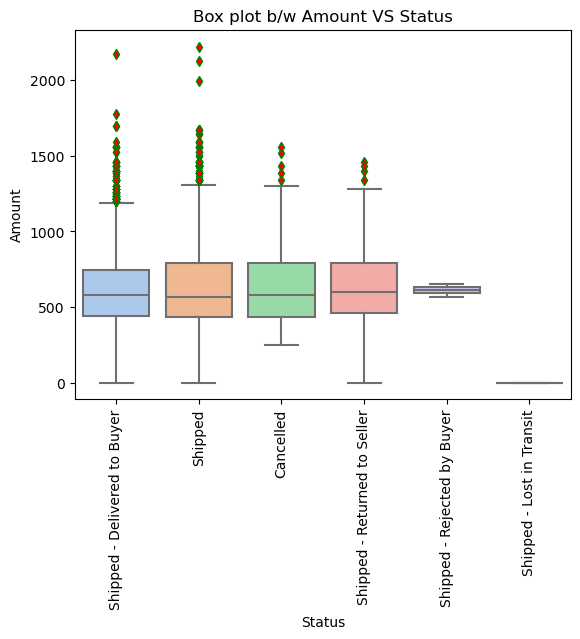

In [125]:
plt.title("Box plot b/w Amount VS Status")
sns.boxplot(data=sale,x="Status",y="Amount",showfliers=True, flierprops={'markerfacecolor': 'red', 'markeredgecolor': 'green'})
plt.xticks(rotation="vertical")
plt.show()

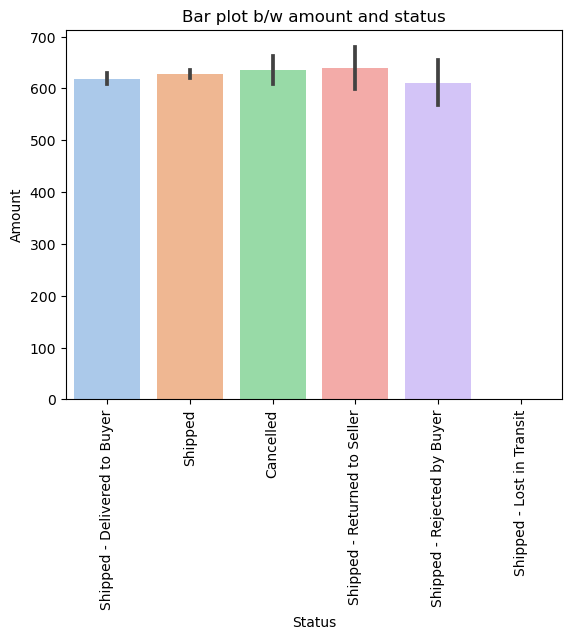

In [127]:
plt.title("Bar plot b/w amount and status")
sns.barplot(data=sale,x="Status",y="Amount")
plt.xticks(rotation="vertical")
plt.show()

# Amount Vs Fulfilment

In [140]:
def num_cat(num,cat):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(f"Strip plot b/w {num} and {cat} col")
    sns.stripplot(data=sale,x=cat,y=num)
    plt.xticks(rotation="vertical")
    
    plt.subplot(1,2,2)
    plt.title(f"Box plot b/w {num} and {cat} col")
    sns.boxplot(data=sale,x=cat,y=num)
    plt.xticks(rotation="vertical")
    
    plt.show()

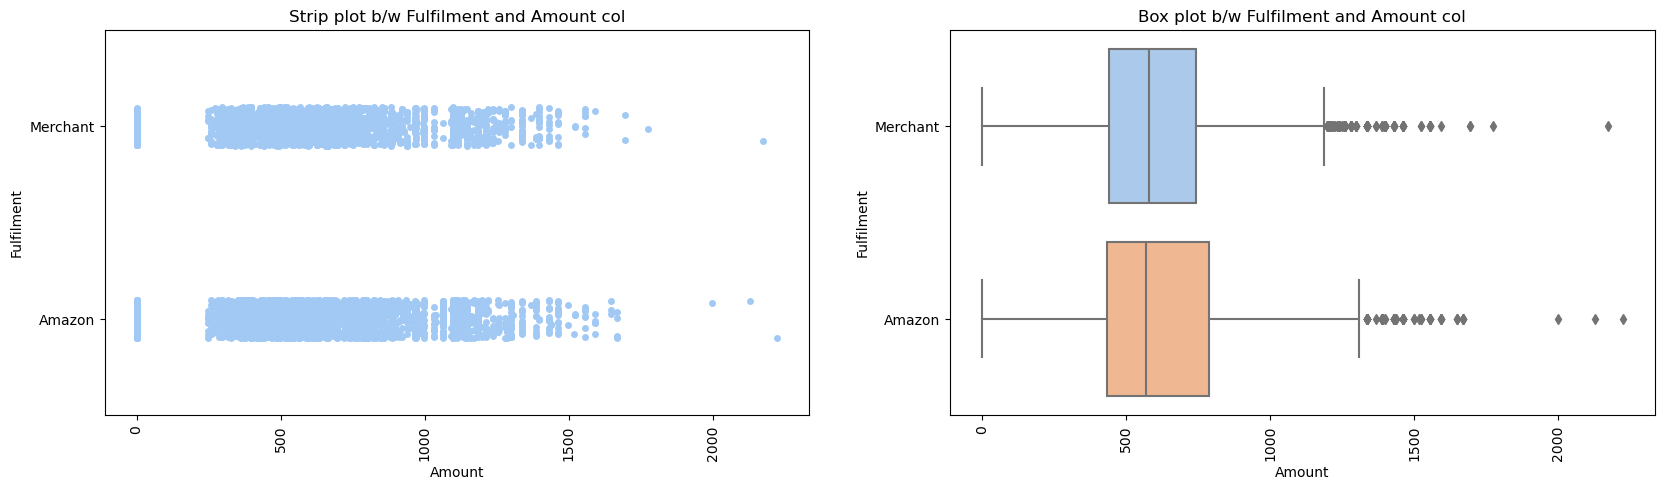

In [143]:
num_cat("Fulfilment","Amount")

# Amount vs Category

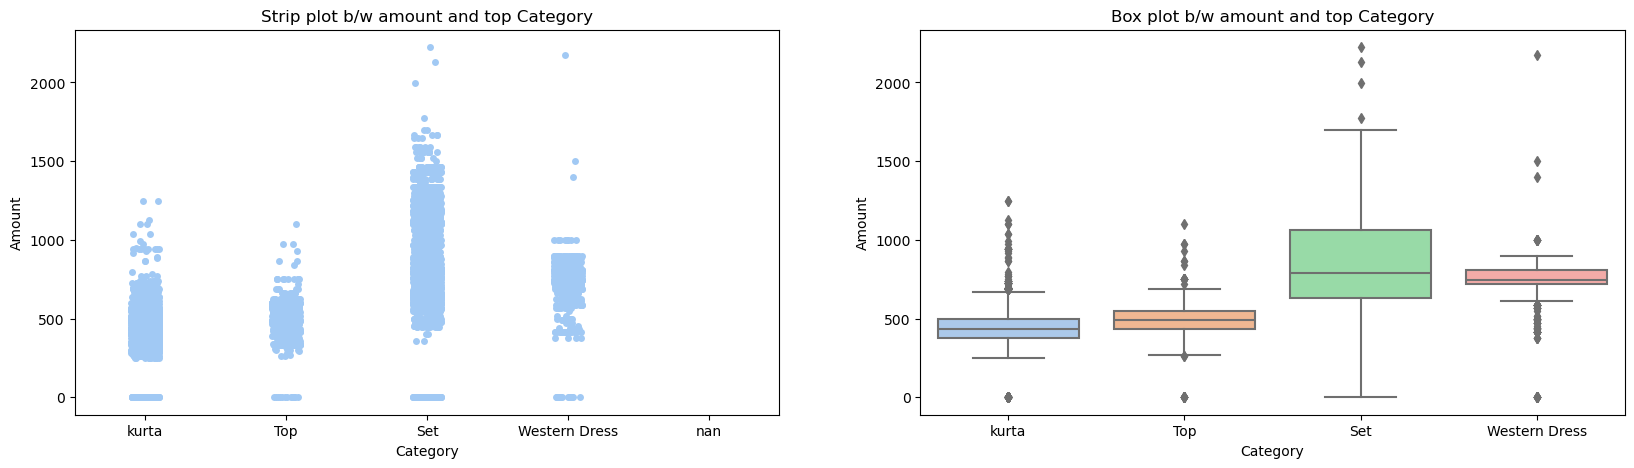

In [150]:
mask=new_df["Category"].value_counts().nlargest(4).index
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Strip plot b/w amount and top Category")
sns.stripplot(x=sale[sale.isin(mask)]["Category"],y=sale["Amount"])

plt.subplot(1,2,2)
plt.title("Box plot b/w amount and top Category")
sns.boxplot(x=sale[sale.isin(mask)]["Category"],y=sale["Amount"])
plt.show()

In [106]:
sale.head(2)

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-country,fulfilled-by
index,,,,,,,,,,,,,,,
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,IN,Easy Ship
2,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,IN,Easy Ship
